In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
torch.cuda.is_available()

True

In [116]:
dataframe = pd.read_csv('Test_data/heart.data.csv')
dataframe = dataframe.drop(columns="Unnamed: 0")
X_tensor = torch.tensor(dataframe.drop(columns=["heart.disease"]).values)
y_tensor = torch.tensor(dataframe["heart.disease"]).unsqueeze(axis=1)
X_tensor, y_tensor = X_tensor.type(torch.float32), y_tensor.type(torch.float32)
X_tensor.dtype, y_tensor.dtype

(torch.float32, torch.float32)

In [103]:
'''# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 5000
step = 1
X_tensor = torch.arange(start, end, step).unsqueeze(dim=1)
X_tensor = X_tensor.type(torch.float32)
y_tensor = weight * X_tensor + bias
X_tensor.type(), y_tensor.type()'''

('torch.FloatTensor', 'torch.FloatTensor')

In [104]:
'''zeros = torch.zeros_like(X_tensor)
X_tensor = torch.stack([X_tensor, zeros], 1).squeeze()
X_tensor.shape'''

torch.Size([5000, 2])

In [117]:
SPLIT_PRCNT = .8
train_split = int(len(X_tensor) * SPLIT_PRCNT)
X_train, y_train = X_tensor[:train_split], y_tensor[:train_split]
X_test, y_test = X_tensor[train_split:], y_tensor[train_split:]
X_test.shape, y_test.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

In [146]:
class HeartDiseaseModel0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=15)
        self.layer_2 = nn.Linear(in_features=15, out_features=5)
        self.layer_3 = nn.Linear(in_features=15, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0 = HeartDiseaseModel()
model_0

HeartDiseaseModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [147]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [155]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []
train_diff = []
test_diff = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    acc = accuracy_fn(y_true=y_train,  y_pred=y_pred)
    
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

     ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calcuate loss and accuracy
        test_loss = loss_fn(test_pred, y_test)
        test_acc = accuracy_fn(y_true=y_test,  y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_diff.append(abs(torch.mean(y_pred - y_train).detach().numpy()))
        test_diff.append(abs(torch.mean(test_pred - y_test).detach().numpy()))
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 3.22631 | Test Loss: 2.83719
Epoch: 10 | Loss: 3.01645 | Test Loss: 2.77864
Epoch: 20 | Loss: 3.10145 | Test Loss: 2.96795
Epoch: 30 | Loss: 3.12799 | Test Loss: 2.88081
Epoch: 40 | Loss: 3.02430 | Test Loss: 2.77585
Epoch: 50 | Loss: 2.94161 | Test Loss: 2.68386
Epoch: 60 | Loss: 3.20196 | Test Loss: 2.90237
Epoch: 70 | Loss: 3.13264 | Test Loss: 2.84190
Epoch: 80 | Loss: 3.09357 | Test Loss: 2.78286
Epoch: 90 | Loss: 3.10946 | Test Loss: 2.81638
Epoch: 100 | Loss: 2.72995 | Test Loss: 2.54159
Epoch: 110 | Loss: 2.67399 | Test Loss: 2.50838
Epoch: 120 | Loss: 2.92229 | Test Loss: 2.78361
Epoch: 130 | Loss: 2.95775 | Test Loss: 2.74573
Epoch: 140 | Loss: 2.92081 | Test Loss: 2.69961
Epoch: 150 | Loss: 2.93463 | Test Loss: 2.69257
Epoch: 160 | Loss: 2.81883 | Test Loss: 2.60689
Epoch: 170 | Loss: 2.92108 | Test Loss: 2.69645
Epoch: 180 | Loss: 2.92367 | Test Loss: 2.67437
Epoch: 190 | Loss: 2.79607 | Test Loss: 2.57165
Epoch: 200 | Loss: 2.96908 | Test Loss: 2.71154
Epo

[35.083305,
 34.083473,
 33.083645,
 32.08381,
 31.083977,
 30.084146,
 29.08431,
 28.08448,
 27.08465,
 26.084814]

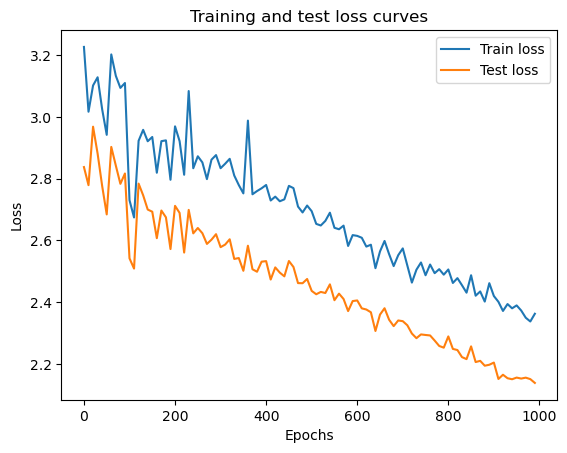

In [156]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

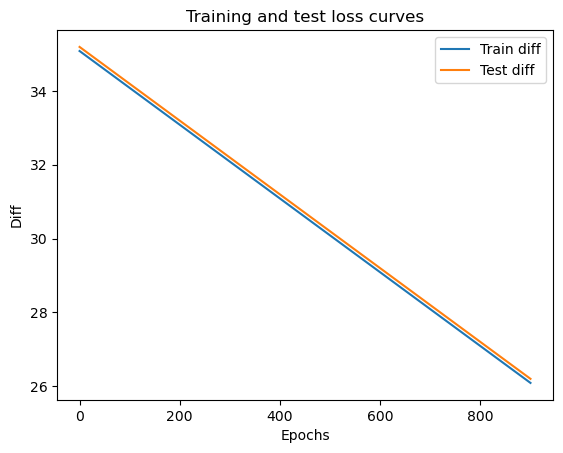

In [144]:
plt.plot(epoch_count, train_diff, label="Train diff")
plt.plot(epoch_count, test_diff, label="Test diff")
plt.title("Training and test loss curves")
plt.ylabel("Diff")
plt.xlabel("Epochs")
plt.legend();